## Decomposition Exercise

In [1]:
# import pandas
import pandas as pd

# import statsmodels.api as sm
import statsmodels.api as sm

# import matplotlib
import matplotlib.pyplot as plt

In [2]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print the top 5 rows

In [5]:
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


* Resample the time series using monthly averages and store the new time series as a Series `y`.

In [1]:
rolling = co2.rolling(window='30D')
y = rolling.mean()

NameError: name 'co2' is not defined

* print the top 5 rows of 'y'

In [9]:
print(y.head())

                co2
1958-03-29  316.100
1958-04-05  316.700
1958-04-12  317.000
1958-04-19  317.125
1958-04-26  316.980


* check for missing values

In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2265 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


* replace missing values with last available value


    - Example: If Feb 2010 is missing, use the value from Jan 2010.

In [15]:
y = y.fillna(method='ffill')
y.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2284 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


* plot the time series `y`

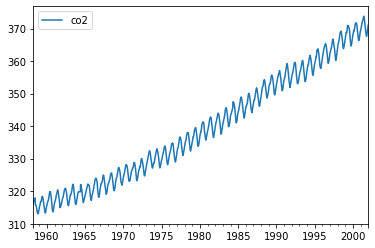

In [17]:
import matplotlib.pyplot as plt

y.plot()
plt.show()

* Apply and plot the following:


    1. additive seasonal decomposition
    2. multiplicative seasonal decomposition

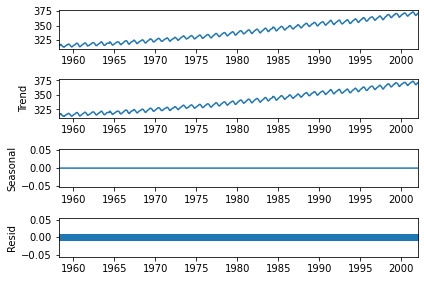

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive = seasonal_decompose(y, model='additive', period=1)
additive.plot()
plt.show()

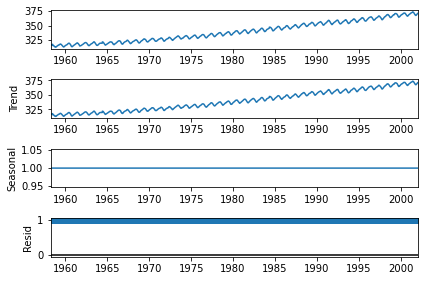

In [21]:
multiplicative = seasonal_decompose(y, model='multiplicative', period=1)
multiplicative.plot()
plt.show()